<a href="https://colab.research.google.com/github/chaitanyap1/Datascience-projects/blob/master/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train = '/content/drive/My Drive/datasets/train.csv'
game_overview = '/content/drive/My Drive/datasets/game_overview.csv'
test = '/content/drive/My Drive/datasets/test.csv'

In [0]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [0]:
train = pd.read_csv(train)
game_overview = pd.read_csv(game_overview)
test = pd.read_csv(test)

In [7]:
train.isnull().sum()

review_id            0
title                0
year               178
user_review          0
user_suggestion      0
dtype: int64

In [8]:
test.isnull().sum()

review_id       0
title           0
year           67
user_review     0
dtype: int64

In [9]:
game_overview.isnull().sum()

title        0
developer    0
publisher    0
tags         0
overview     0
dtype: int64

In [10]:
train.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


In [11]:
test.head()

,review_id,title,year,user_review
0,1603,Counter-Strike: Global Offensive,2015.0,"Nice graphics, new maps, weapons and models. B..."
1,1604,Counter-Strike: Global Offensive,2018.0,I would not recommend getting into this at its...
2,1605,Counter-Strike: Global Offensive,2018.0,Edit 11/12/18I have tried playing CS:GO recent...
3,1606,Counter-Strike: Global Offensive,2015.0,The game is great. But the community is the wo...
4,1607,Counter-Strike: Global Offensive,2015.0,I thank TrulyRazor for buying this for me a lo...


In [12]:
print(train.shape,test.shape,game_overview.shape)

(17494, 5) (8045, 4) (64, 5)


In [13]:
train['user_suggestion'].value_counts()

1    9968
0    7526
Name: user_suggestion, dtype: int64

In [0]:
train['data'] = 'train'
test['data'] = 'test'
test['user_suggestion'] = 0
all = pd.concat([train,test],axis = 0)

In [15]:
all.shape

(25539, 6)

In [16]:
all.head()

,review_id,title,year,user_review,user_suggestion,data
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,train
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,train
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,train
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,train
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,train


In [17]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25539 entries, 0 to 8044
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        25539 non-null  int64  
 1   title            25539 non-null  object 
 2   year             25294 non-null  float64
 3   user_review      25539 non-null  object 
 4   user_suggestion  25539 non-null  int64  
 5   data             25539 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.4+ MB


In [18]:
all.describe()

,review_id,year,user_suggestion
count,25539.000000,25294.000000,25539.000000
mean,12770.000000,2016.318336,0.390305
std,7372.618599,1.372628,0.487828
min,1.000000,2011.000000,0.000000
25%,6385.500000,2015.000000,0.000000
50%,12770.000000,2016.000000,0.000000
75%,19154.500000,2017.000000,1.000000
max,25539.000000,2018.000000,1.000000


In [0]:
all['review_length'] = all.apply(lambda row: len(str(row['user_review'])), axis=1)

In [20]:
len(all['title'].unique()), all['title'].unique()

(64, array(["Spooky's Jump Scare Mansion", 'Sakura Clicker', 'WARMODE',
        'Fractured Space', 'Dota 2', 'Path of Exile', 'War Thunder',
        'Ring of Elysium', 'Team Fortress 2', 'Yu-Gi-Oh! Duel Links',
        'SMITE®', 'Brawlhalla', 'World of Tanks Blitz',
        'DCS World Steam Edition', 'Heroes & Generals',
        'The Elder Scrolls®: Legends™', 'Trove', 'Neverwinter',
        'Realm Royale', 'PlanetSide 2', 'Realm of the Mad God', 'Elsword',
        'theHunter Classic', 'Eternal Card Game', 'Black Squad',
        'Freestyle 2: Street Basketball', 'Bless Online',
        'RaceRoom Racing Experience', 'Fallout Shelter',
        'Tactical Monsters Rumble Arena', 'Creativerse', 'Dreadnought',
        'Infestation: The New Z', 'Shop Heroes', 'Robocraft',
        'Business Tour - Board Game with Online Multiplayer',
        'Crusaders of the Lost Idols', 'AdventureQuest 3D',
        'Realm Grinder', 'World of Guns: Gun Disassembly',
        'Bloons TD Battles', 'Cuisine Royal

In [21]:
all.isnull().sum()

review_id            0
title                0
year               245
user_review          0
user_suggestion      0
data                 0
review_length        0
dtype: int64

In [0]:
all['year'].fillna(all['year'].mode()[0], inplace=True)

In [23]:
all.shape

(25539, 7)

In [24]:
training = pd.merge(all,game_overview , on=['title'], how='left')
training.head()

,review_id,title,year,user_review,user_suggestion,data,review_length,developer,publisher,tags,overview
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,train,710,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,train,335,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,train,397,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,train,280,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,train,334,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...


In [0]:
training['overview_length'] = training.apply(lambda row: len(str(row['overview'])), axis=1)

In [26]:
training.shape

(25539, 12)

In [27]:
training

,review_id,title,year,user_review,user_suggestion,data,review_length,developer,publisher,tags,overview,overview_length
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,train,710,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...,472
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,train,335,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...,472
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,train,397,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...,472
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,train,280,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...,472
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,train,334,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...,472
...,...,...,...,...,...,...,...,...,...,...,...,...
25534,25198,GUNS UP!,2017.0,Early Access ReviewGuns UP!Positive: Good Idea...,0,test,468,"Valkyrie Entertainment, LLC","PlayStation Mobile, Inc.","['Free to Play', 'Strategy', 'Multiplayer', 'A...","In a mashup of RTS & Tower Defense, GUNS UP! i...",1488
25535,25199,GUNS UP!,2018.0,"After 170 hrs, my review. DO NOT SPEND ANY MON...",0,test,1044,"Valkyrie Entertainment, LLC","PlayStation Mobile, Inc.","['Free to Play', 'Strategy', 'Multiplayer', 'A...","In a mashup of RTS & Tower Defense, GUNS UP! i...",1488
25536,25200,GUNS UP!,2018.0,Pros:-Fun GameplayCons: -Micro %$#*ing transac...,0,test,403,"Valkyrie Entertainment, LLC","PlayStation Mobile, Inc.","['Free to Play', 'Strategy', 'Multiplayer', 'A...","In a mashup of RTS & Tower Defense, GUNS UP! i...",1488
25537,25201,GUNS UP!,2018.0,"Actualy saucy, I definetly suggest to players ...",0,test,771,"Valkyrie Entertainment, LLC","PlayStation Mobile, Inc.","['Free to Play', 'Strategy', 'Multiplayer', 'A...","In a mashup of RTS & Tower Defense, GUNS UP! i...",1488


In [0]:
#train=training[training['data']=='train']
#del train['data']
#test=training[training['data']=='test']
#test.drop(['user_suggestion','data'],axis=1,inplace=True)

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#training['tags'].value_counts()

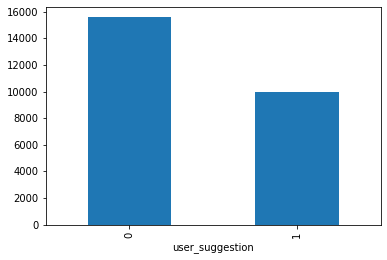

In [31]:
training.groupby('user_suggestion').user_review.count().plot.bar()
plt.show()

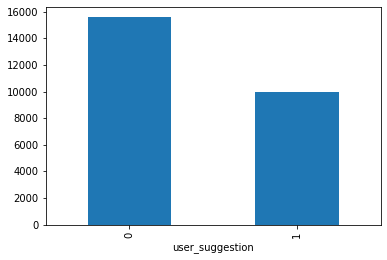

In [32]:
training.groupby('user_suggestion').title.count().plot.bar()
plt.show()

In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
import re
from nltk.corpus import stopwords
stops = stopwords.words('english')

In [35]:
training['user_review'][11300]

"Early Access ReviewCan't give you a thumbs up in the current state. Yes, I'm gonna keep playing it, but I'm pretty upset with your ranked system. What's the point of being a bronze 3 if you're going to keep matching me against silvers? It's not like there's a lack of players..."

In [36]:
#training['user_review'] = training['user_review'].apply(lambda x:remove_punctuation(x))
training['user_review'].head()

0    I'm scared and hearing creepy voices.  So I'll...
1    Best game, more better than Sam Pepper's YouTu...
2    A littly iffy on the controls, but once you kn...
3    Great game, fun and colorful and all that.A si...
4    Not many games have the cute tag right next to...
Name: user_review, dtype: object

In [0]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [0]:
training['user_review'] = training['user_review'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [0]:
training['overview'] = training['overview'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [40]:
training['overview'].head()

0    [can, you, survive, 1000, rooms, of, cute, ter...
1    [can, you, survive, 1000, rooms, of, cute, ter...
2    [can, you, survive, 1000, rooms, of, cute, ter...
3    [can, you, survive, 1000, rooms, of, cute, ter...
4    [can, you, survive, 1000, rooms, of, cute, ter...
Name: overview, dtype: object

In [41]:
training['user_review'].head(10)

0    [i, m, scared, and, hearing, creepy, voices, s...
1    [best, game, more, better, than, sam, pepper, ...
2    [a, littly, iffy, on, the, controls, but, once...
3    [great, game, fun, and, colorful, and, all, th...
4    [not, many, games, have, the, cute, tag, right...
5    [early, access, reviewit, s, pretty, cute, at,...
6    [great, game, it, s, a, cute, little, horror, ...
7    [spooky, s, jump, scare, mansion, is, a, free,...
8    [somewhere, between, light, hearted, happy, pa...
9    [this, game, with, its, cute, little, out, of,...
Name: user_review, dtype: object

In [0]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [0]:
training['overview'] = training['overview'].apply(lambda x : remove_stopwords(x))

In [44]:
training['overview'].head()

0    [survive, 1000, rooms, cute, terror, break, cu...
1    [survive, 1000, rooms, cute, terror, break, cu...
2    [survive, 1000, rooms, cute, terror, break, cu...
3    [survive, 1000, rooms, cute, terror, break, cu...
4    [survive, 1000, rooms, cute, terror, break, cu...
Name: overview, dtype: object

In [0]:
training['user_review'] = training['user_review'].apply(lambda x : remove_stopwords(x))

In [46]:
training['user_review'].head(34)

0     [scared, hearing, creepy, voices, pause, momen...
1     [best, game, better, sam, pepper, youtube, acc...
2     [littly, iffy, controls, know, play, easy, mas...
3     [great, game, fun, colorful, side, note, thoug...
4     [many, games, cute, tag, right, next, horror, ...
5     [early, access, reviewit, pretty, cute, first,...
6     [great, game, cute, little, horror, game, prog...
7     [spooky, jump, scare, mansion, free, retro, ma...
8     [somewhere, light, hearted, happy, parody, afr...
9     [game, cute, little, wall, pop, ups, scared, l...
10    [early, access, reviewi, thought, game, would,...
11    [early, access, reviewgreen, ghosty, goo, thin...
12    [early, access, reviewrooms, 1, 20, cute, ador...
13    [early, access, reviewgreat, game, always, run...
14    [name, says, get, fooled, seemingly, normal, t...
15    [never, would, thought, something, adorably, c...
16    [first, get, hugged, cardboard, cut, outs, get...
17    [exactly, think, progress, 1000, rooms, ho

In [0]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [0]:
def word_lemmatizer(text):
    lem_text = " ".join([lemmatizer.lemmatize(i) for i in text])
    return lem_text

In [49]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [50]:
training['user_review']=training['user_review'].apply(lambda x: word_lemmatizer(x))
training['user_review'].head()

0    scared hearing creepy voice pause moment write...
1    best game better sam pepper youtube account 10...
2    littly iffy control know play easy master made...
3    great game fun colorful side note though getti...
4    many game cute tag right next horror tag steam...
Name: user_review, dtype: object

In [51]:
training['overview']=training['overview'].apply(lambda x: word_lemmatizer(x))
training['overview'].head()[56]

0    survive 1000 room cute terror break cuteness s...
1    survive 1000 room cute terror break cuteness s...
2    survive 1000 room cute terror break cuteness s...
3    survive 1000 room cute terror break cuteness s...
4    survive 1000 room cute terror break cuteness s...
Name: overview, dtype: object

In [58]:
training['overview'][598]

'free play shooter confrontation two irreconcilable side represented government military housing armed hireling try hand virtual battle scale dynamic hurricane gameplay spirit classical shooter game available wide range map several mode level system allows player open achievement weapon sticker'

In [0]:
1#stemmer = PorterStemmer()

In [0]:
#def word_stemmer(text):
    #stem_text = " ".join([stemmer.stem(i) for i in text])
    #return stem_text

In [0]:
#training['user_review'] = training['user_review'].apply(lambda x: word_stemmer(x))

In [0]:
#training['user_review'].head()

In [59]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25539 entries, 0 to 25538
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        25539 non-null  int64  
 1   title            25539 non-null  object 
 2   year             25539 non-null  float64
 3   user_review      25539 non-null  object 
 4   user_suggestion  25539 non-null  int64  
 5   data             25539 non-null  object 
 6   review_length    25539 non-null  int64  
 7   developer        25539 non-null  object 
 8   publisher        25539 non-null  object 
 9   tags             25539 non-null  object 
 10  overview         25539 non-null  object 
 11  overview_length  25539 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 3.8+ MB


In [60]:
training.drop(['developer', 'publisher'], axis=1)

,review_id,title,year,user_review,user_suggestion,data,review_length,tags,overview,overview_length
0,1,Spooky's Jump Scare Mansion,2016.0,scared hearing creepy voice pause moment write...,1,train,710,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",survive 1000 room cute terror break cuteness s...,472
1,2,Spooky's Jump Scare Mansion,2016.0,best game better sam pepper youtube account 10...,1,train,335,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",survive 1000 room cute terror break cuteness s...,472
2,3,Spooky's Jump Scare Mansion,2016.0,littly iffy control know play easy master made...,1,train,397,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",survive 1000 room cute terror break cuteness s...,472
3,4,Spooky's Jump Scare Mansion,2015.0,great game fun colorful side note though getti...,1,train,280,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",survive 1000 room cute terror break cuteness s...,472
4,5,Spooky's Jump Scare Mansion,2015.0,many game cute tag right next horror tag steam...,1,train,334,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",survive 1000 room cute terror break cuteness s...,472
...,...,...,...,...,...,...,...,...,...,...
25534,25198,GUNS UP!,2017.0,early access reviewguns positive good idea add...,0,test,468,"['Free to Play', 'Strategy', 'Multiplayer', 'A...",mashup rts tower defense gun action packed str...,1488
25535,25199,GUNS UP!,2018.0,170 hr review spend money would seam better ch...,0,test,1044,"['Free to Play', 'Strategy', 'Multiplayer', 'A...",mashup rts tower defense gun action packed str...,1488
25536,25200,GUNS UP!,2018.0,pro fun gameplaycons micro ing transaction rea...,0,test,403,"['Free to Play', 'Strategy', 'Multiplayer', 'A...",mashup rts tower defense gun action packed str...,1488
25537,25201,GUNS UP!,2018.0,actualy saucy definetly suggest player life ne...,0,test,771,"['Free to Play', 'Strategy', 'Multiplayer', 'A...",mashup rts tower defense gun action packed str...,1488
